In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [3]:
raw_data = loadmat('ex6data1.mat')

In [8]:
data = pd.DataFrame(raw_data['X'], columns = ['x1','x2'])
data['y'] = raw_data['y']

In [9]:
data.head()

,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [107]:
def plot_init_data(data, fig, ax):
    positive = data[data['y'] == 1]
    negative = data[data['y'] == 0]
    
    ax.scatter(positive['x1'], positive['x2'], s = 50, marker = 'x', label = 'positive')
    ax.scatter(negative['x1'], negative['x2'], s = 50, marker = 'o', label = 'negative')

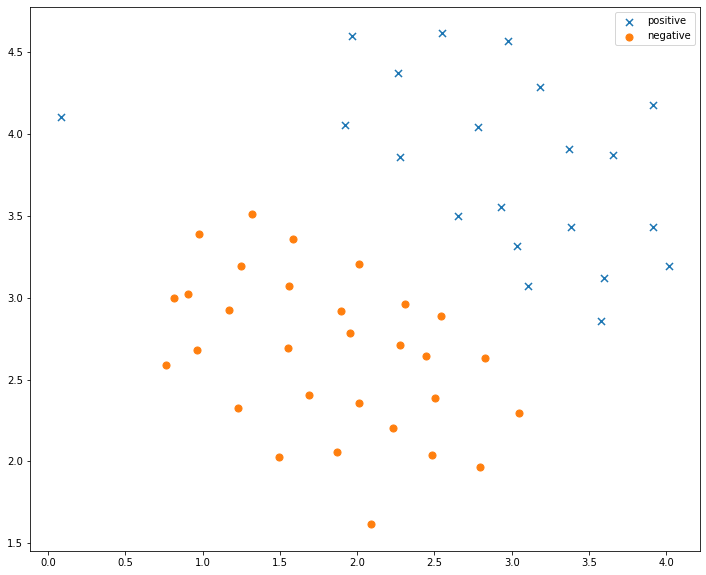

In [108]:
fig, ax = plt.subplots(figsize = (12,10))
plot_init_data(data, fig, ax)
ax.legend() # 添加图例说明
plt.show()

In [109]:
from sklearn import svm

In [119]:

svc = svm.LinearSVC(C = 1)

In [120]:
svc.fit(data[['x1','x2']],data['y']) # data[[col1,col2]]可以一次表示多列
svc.score(data[['x1','x2']], data['y'])


0.9803921568627451

In [148]:
def find_decision_boundary(svc, data, diff):
    x1min = min(data['x1']) - 0.1
    x1max = max(data['x1']) + 0.1
    x2min = min(data['x2']) - 0.1
    x2max = max(data['x2']) + 0.1
    
    x1 = np.linspace(x1min, x1max, 1000)
    x2 = np.linspace(x2min, x2max, 1000)
    
    cordinates = [(x,y) for x in x1 for y in x2]
    x_cord, y_cord = zip(*cordinates)
    c_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord}) # 将大量的二维元组转化到df中
    c_val['c_val'] = svc.decision_function(c_val[['x1', 'x2']]) # 计算所有的数到超平面的距离
    
    decision = c_val[np.abs(c_val['c_val']) < diff]
    
    return decision['x1'], decision['x2']
    
    
    
        
    

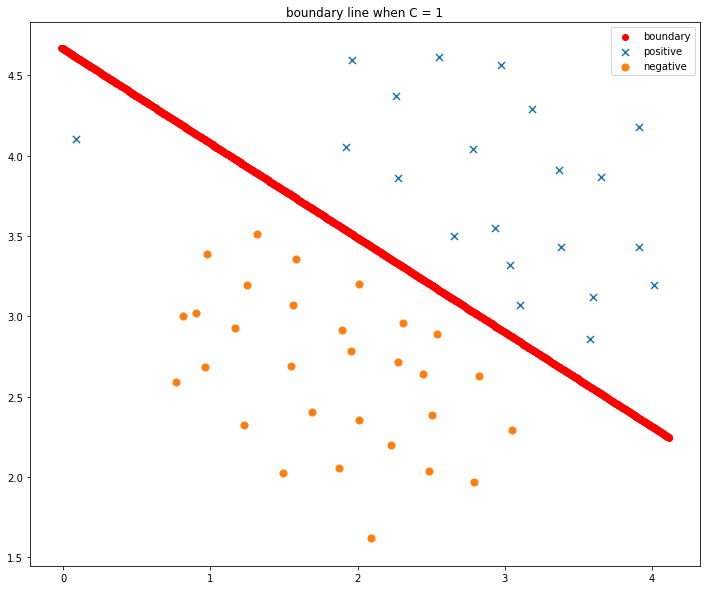

In [149]:
x1, x2 = find_decision_boundary(svc, data, 2 * 10**-3)
fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(x1, x2, c = 'r', label = 'boundary')
plot_init_data(data, fig, ax)
ax.legend() # 添加图例说明
ax.set_title('boundary line when C = 1')
plt.show()


In [150]:
C = 1
svc2 = svm.LinearSVC(C = 100)

In [151]:
svc2.fit(data[['x1','x2']], data['y'])
svc2.score(data[['x1','x2']], data['y'])

/Users/kangyifu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9803921568627451

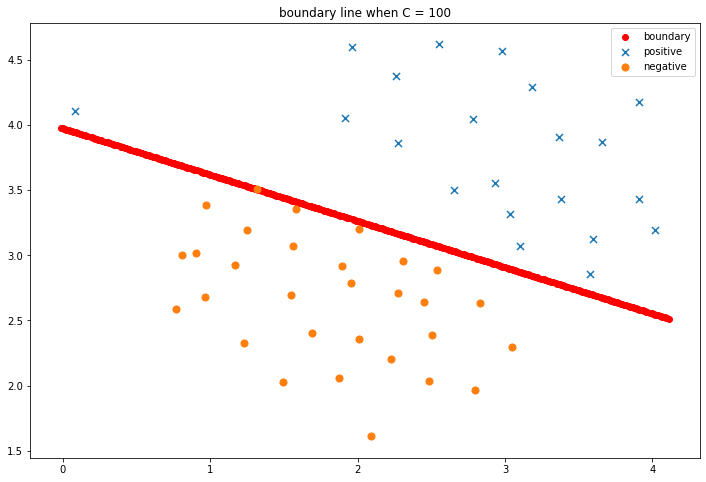

In [156]:
x3, x4 = find_decision_boundary(svc2, data, 2 * 10**-3)
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(x3, x4, c = 'r', label = 'boundary')
plot_init_data(data, fig, ax)
ax.legend()
ax.set_title('boundary line when C = 100')
plt.show()

In [157]:
raw_data2 = loadmat('ex6data2.mat')


In [158]:
data2 = pd.DataFrame(raw_data2['X'], columns = ['x1','x2'])
data2['y'] = raw_data2['y']

In [159]:
svc3 = svm.SVC(C = 100, gamma = 10, probability = True)
svc3

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [160]:
svc3.fit(data2[['x1','x2']], data2['y'])
svc3.score(data2[['x1','x2']], data2['y'])

0.9698725376593279

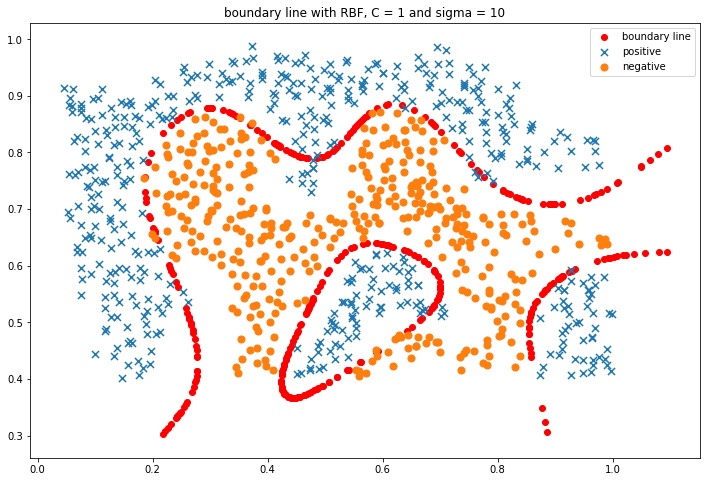

In [161]:
x21, x22 = find_decision_boundary(svc3, data2, 2*10**-3)
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(x21, x22, c = 'r', label = 'boundary line')
plot_init_data(data2, fig, ax)
ax.legend()
ax.set_title('boundary line with RBF, C = 1 and sigma = 10')
plt.show()

In [172]:
raw_data3 = loadmat('ex6data3.mat')
data3 = pd.DataFrame(raw_data3['X'], columns = ['x1','x2'])
data3['y'] = raw_data3['y']
data_val =  pd.DataFrame(raw_data3['Xval'], columns = ['x1','x2'])
data_val['yval'] = raw_data3['yval']

In [174]:
data_val.head()

,x1,x2,yval
0,-0.353062,-0.673902,0
1,-0.227126,0.447320,1
2,0.092898,-0.753524,0
3,0.148243,-0.718473,0
4,-0.001512,0.162928,0


In [192]:
C_values = np.linspace(0.00001, 100, 10000)
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
best_score = 0

best_params = {'best_C': 0, 'best_gamma': 0}
for i in C_values:
    for j in gamma_values:
        svc4 = svm.SVC(C = i, gamma = j)
        svc4.fit(data3[['x1','x2']], data3['y'])
        score = svc4.score(data_val[['x1','x2']], data_val['yval'])
        if score > best_score:
            best_score = score
            best_params['best_C'] = i
            best_params['best_gamma'] = j

best_score, best_params

(0.97, {'best_C': 0.20002998199819982, 'best_gamma': 100})

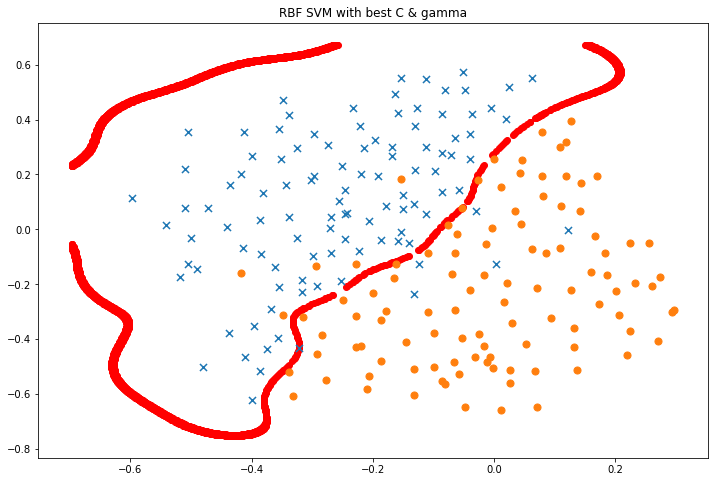

In [195]:
C1 = best_params['best_C']
gamma1 = best_params['best_gamma']

svc4 = svm.SVC(C = C1, gamma = gamma1)
svc4.fit(data3[['x1','x2']], data3['y'])
x22, x33 = find_decision_boundary(svc4, data3, 2 * 10**-3)
fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(x22, x33, c = 'r', label = 'boundary line')
plot_init_data(data3, fig, ax)
ax.legend
ax.set_title('RBF SVM with best C & gamma')
plt.show()

In [196]:
spam_train = loadmat('spamTrain.mat')
spam_test = loadmat('spamTest.mat')

spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [202]:
X = pd.DataFrame(spam_train['X'])
y = spam_train['y']
Xtest = pd.DataFrame(spam_test['Xtest'])
ytest = spam_test['ytest']

In [209]:
svc = svm.SVC(C = 1)
svc.fit(X,y)
svc.score(X,y)

/Users/kangyifu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kangyifu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.944

In [210]:
svc.score(Xtest, ytest)

0.953

In [214]:
uk = np.eye(1899) 
spam_val = pd.DataFrame({'idx': range(1899)})

In [215]:
spam_val['isspam'] = svc.decision_function(uk)

In [217]:
spam_val['isspam'].describe()

count    1899.000000
mean       -0.622564
std         0.021603
min        -0.763138
25%        -0.631616
50%        -0.624299
75%        -0.615918
max        -0.364164
Name: isspam, dtype: float64

In [218]:
decision = spam_val[spam_val['isspam'] > -0.55]

In [219]:
decision

,idx,isspam
173,173,-0.546054
297,297,-0.364164
478,478,-0.543913
529,529,-0.524535
680,680,-0.524313
738,738,-0.549962
774,774,-0.489291
1059,1059,-0.547064
1088,1088,-0.531602
1163,1163,-0.549382


In [234]:
vocab = pd.read_csv('vocab.txt', header = None, names = ['idx', 'word'], sep = '\t')


In [231]:
spam_word = vocab.loc[list(decision['idx'])]

In [232]:
spam_word

,idx,word
173,174,below
297,298,click
478,479,dollarnumb
529,530,email
680,681,free
738,739,guarante
774,775,here
1059,1060,monei
1088,1089,nbsp
1163,1164,offer
